<a href="https://colab.research.google.com/github/DmytroBuzanov/Anomaly-Detection/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Імпорт необхідних бібліотек

import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Зчитування даних

df = pd.read_csv('/content/drive/My Drive/data/3_2020-03-16 SPY.txt')
df

,datetime,price,volume,sumVolume,bid,ask,tickId,basis,tradeMarketCenter,TradeConditions,TradeAggressor,ecn,Unnamed: 12
0,2020-03-16 04:00:00.017723,253.20,2771,2771,252.41,253.20,808464454,E,11,1747,0,16,NaN
1,2020-03-16 04:00:00.021236,262.75,300,3071,252.41,253.20,808731993,E,5,173D,0,16,NaN
2,2020-03-16 04:00:00.022473,253.20,600,3671,252.41,253.20,808464455,E,11,173D,0,16,NaN
3,2020-03-16 04:00:00.023496,258.84,300,3971,252.41,253.20,808731994,E,5,173D,0,16,NaN
4,2020-03-16 04:00:00.690195,253.20,10,3981,252.41,253.20,808732012,O,5,873D17,0,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147733,2020-03-16 19:59:56.862917,244.89,96,297240017,244.79,244.92,813134709,O,26,873D17,0,16,NaN
2147734,2020-03-16 19:59:56.862940,244.89,9,297240026,244.79,244.92,813134710,O,26,873D17,0,16,NaN
2147735,2020-03-16 19:59:58.628865,244.90,1,297240027,244.80,244.95,813134712,O,26,873D17,0,16,NaN
2147736,2020-03-16 20:00:00.001778,239.85,0,297240027,244.79,244.92,1211452497,C,11,88,0,16,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147738 entries, 0 to 2147737
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   datetime           object 
 1   price              float64
 2   volume             int64  
 3   sumVolume          int64  
 4   bid                float64
 5   ask                float64
 6   tickId             int64  
 7   basis              object 
 8   tradeMarketCenter  int64  
 9   TradeConditions    object 
 10  TradeAggressor     int64  
 11  ecn                int64  
 12  Unnamed: 12        float64
dtypes: float64(4), int64(6), object(3)
memory usage: 213.0+ MB


In [4]:
df.describe()

,price,volume,sumVolume,bid,ask,tickId,tradeMarketCenter,TradeAggressor,ecn,Unnamed: 12
count,2.147738e+06,2.147738e+06,2.147738e+06,2.147738e+06,2.147738e+06,2.147738e+06,2.147738e+06,2147738.0,2147738.0,0.0
mean,2.476152e+02,1.383966e+02,1.356271e+08,2.476001e+02,2.476252e+02,9.868476e+08,2.026641e+01,0.0,16.0,NaN
std,4.095209e+00,3.830150e+03,7.421835e+07,4.094107e+00,4.089046e+00,2.576151e+08,2.547525e+01,0.0,0.0,NaN
min,2.373600e+02,0.000000e+00,2.771000e+03,2.373600e+02,2.373700e+02,8.084644e+08,5.000000e+00,0.0,16.0,NaN
25%,2.449900e+02,1.300000e+01,7.195093e+07,2.449700e+02,2.450000e+02,8.107081e+08,1.100000e+01,0.0,16.0,NaN
50%,2.476100e+02,9.100000e+01,1.353438e+08,2.476000e+02,2.476200e+02,8.588023e+08,1.200000e+01,0.0,16.0,NaN
75%,2.506900e+02,1.000000e+02,1.939370e+08,2.506800e+02,2.507000e+02,1.113479e+09,2.500000e+01,0.0,16.0,NaN
max,2.788800e+02,3.399842e+06,2.972400e+08,2.568800e+02,2.569000e+02,2.054845e+09,1.640000e+02,0.0,16.0,NaN


In [5]:
df = df[['datetime',	'price',	'volume',	'sumVolume',	'bid',	'ask',	'tickId',	'tradeMarketCenter']]

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = pd.to_numeric(pd.to_datetime(df['datetime']))
# df = df.set_index(pd.DatetimeIndex(df['datetime']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,price,volume,sumVolume,bid,ask,tickId,tradeMarketCenter
0,1584331200017723000,253.20,2771,2771,252.41,253.20,808464454,11
1,1584331200021236000,262.75,300,3071,252.41,253.20,808731993,5
2,1584331200022473000,253.20,600,3671,252.41,253.20,808464455,11
3,1584331200023496000,258.84,300,3971,252.41,253.20,808731994,5
4,1584331200690195000,253.20,10,3981,252.41,253.20,808732012,5
...,...,...,...,...,...,...,...,...
2147733,1584388796862917000,244.89,96,297240017,244.79,244.92,813134709,26
2147734,1584388796862940000,244.89,9,297240026,244.79,244.92,813134710,26
2147735,1584388798628865000,244.90,1,297240027,244.80,244.95,813134712,26
2147736,1584388800001778000,239.85,0,297240027,244.79,244.92,1211452497,11


**Пошук аномалій**

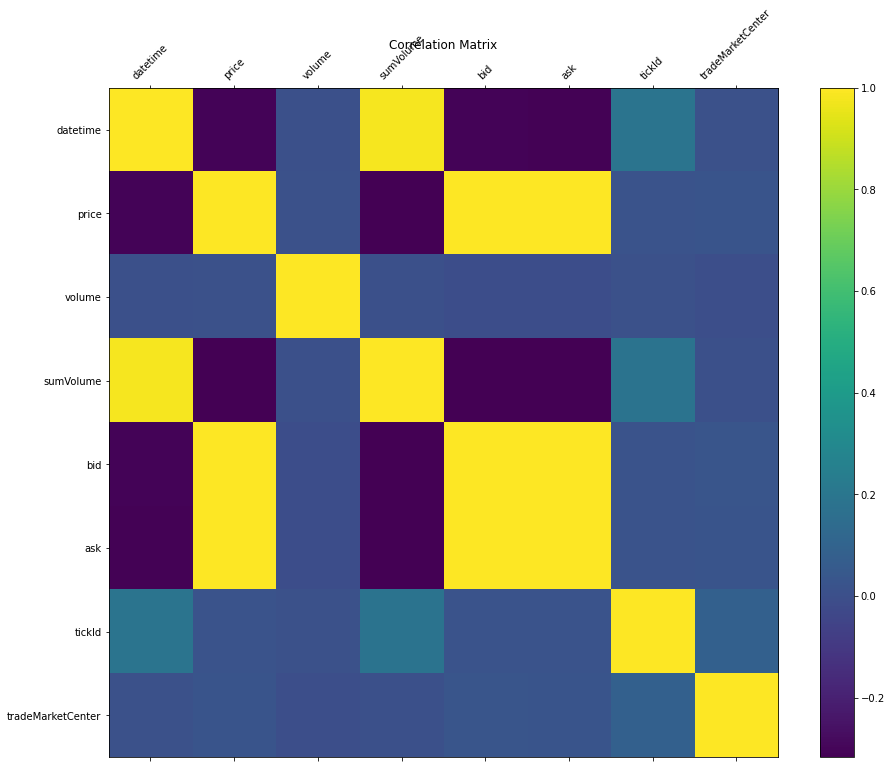

In [7]:
# Кореляційна матриця

f = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=12);

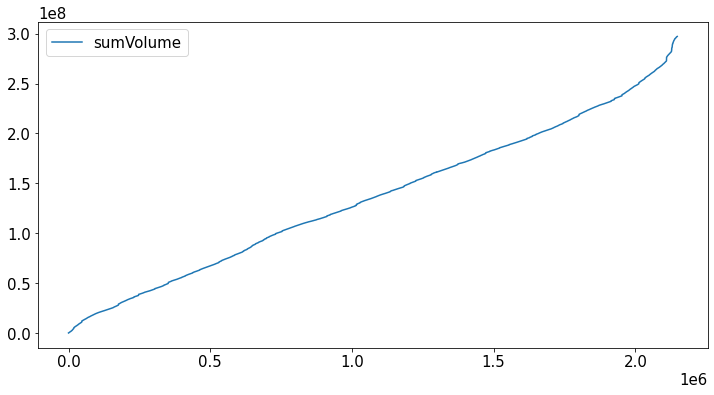

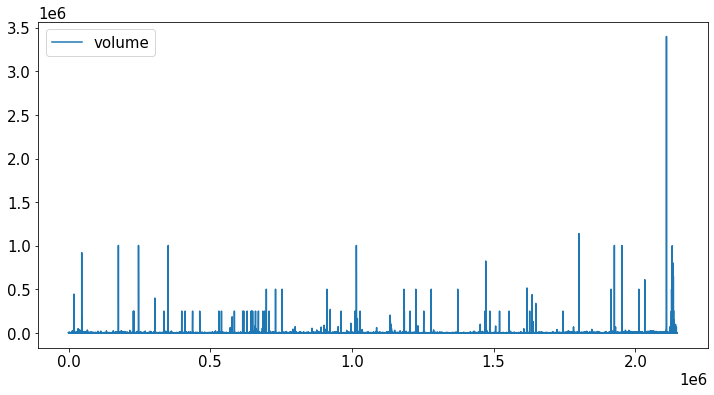

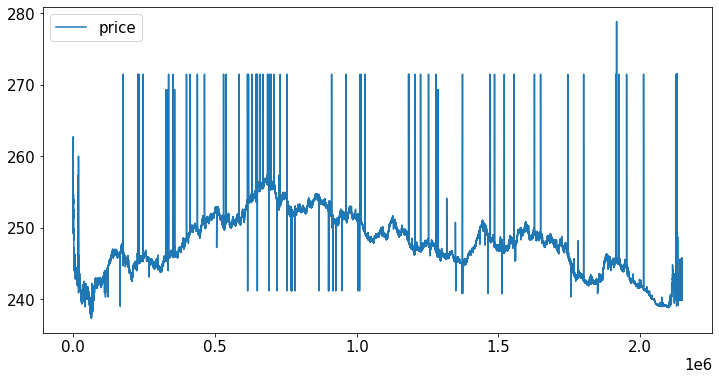

In [8]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
df[['sumVolume']].plot()
df[['volume']].plot()
df[['price']].plot()

In [9]:
outliers_fraction = float(.01)
scaler = StandardScaler()
# np_scaled = scaler.fit_transform(df[['sumVolume', 'volume', 'price']].values.reshape(-1, 1))
np_scaled = scaler.fit_transform(df.values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data)

data.drop_duplicates()

,0
0,2.645690
1,-0.377964
2,-0.377964
6,-0.377964
7,-0.377964
...,...
17181867,-0.377964
17181872,2.645800
17181880,2.645800
17181888,2.645800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


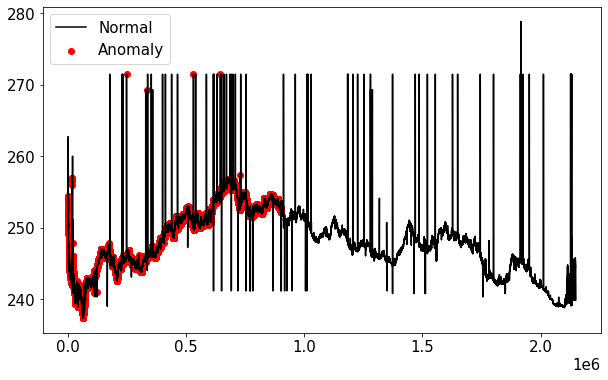

In [11]:
df['anomaly'] = model.predict(data.head(2147738))
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly'] == -1, ['price']] #anomaly
ax.plot(df.index, df['price'], color='black', label = 'Normal')
ax.scatter(a.index, a['price'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


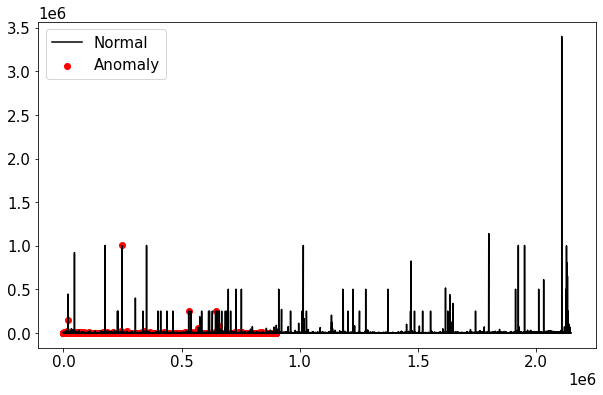

In [12]:
df['anomaly'] = model.predict(data.head(2147738))
# visualization
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly'] == -1, ['volume']] #anomaly
ax.plot(df.index, df['volume'], color='black', label = 'Normal')
ax.scatter(a.index, a['volume'], color='red', label = 'Anomaly')
plt.legend()
plt.show();